In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import utils as ut
import importlib
from IPython.display import Image
from shapely.geometry import Point

In [2]:
importlib.reload(ut)

<module 'utils' from 'c:\\Users\\david\\OneDrive - Universidad del rosario\\Educacion\\Cursos\\Henry_Programacion\\Road-Accidents-DA\\utils.py'>

# Homicidios Dataset

Normalizing descriptive metadata and dataset in order to work with a proper data format and descriptions.

## Metadata Transformation

Reading the Metadata Sheet

In [6]:
df_md = pd.read_excel('data/homicidios.xlsx', sheet_name='DICCIONARIO_HECHOS')
df_md

,variables y definiciones,descripción
0,ID,identificador unico del siniestro
1,N_VICTIMAS,cantidad de víctimas
2,FECHA,fecha en formato dd/mm/aaaa
3,AAAA,año
4,MM,mes
5,DD,día del mes
6,HORA,hora del siniestro
7,HH,franja horaria entera
8,LUGAR_DEL_HECHO,Dirección del hecho
9,TIPO_DE_CALLE,Tipo de arteria. En el caso de intersecciones ...


Capitalizing every string in the 'descripción' column

In [7]:
df_md['descripción'] = df_md['descripción'].str.capitalize()
df_md

,variables y definiciones,descripción
0,ID,Identificador unico del siniestro
1,N_VICTIMAS,Cantidad de víctimas
2,FECHA,Fecha en formato dd/mm/aaaa
3,AAAA,Año
4,MM,Mes
5,DD,Día del mes
6,HORA,Hora del siniestro
7,HH,Franja horaria entera
8,LUGAR_DEL_HECHO,Dirección del hecho
9,TIPO_DE_CALLE,Tipo de arteria. en el caso de intersecciones ...


Renaming columns

In [8]:
df_md.rename(columns={'variables y definiciones': 'Variable', 'descripción': 'Descripcion'}, inplace=True)
df_md

,Variable,Descripcion
0,ID,Identificador unico del siniestro
1,N_VICTIMAS,Cantidad de víctimas
2,FECHA,Fecha en formato dd/mm/aaaa
3,AAAA,Año
4,MM,Mes
5,DD,Día del mes
6,HORA,Hora del siniestro
7,HH,Franja horaria entera
8,LUGAR_DEL_HECHO,Dirección del hecho
9,TIPO_DE_CALLE,Tipo de arteria. en el caso de intersecciones ...


Capitalizing every letter of the variable column

In [9]:
df_md['Variable'] = df_md['Variable'].str.upper()
df_md

,Variable,Descripcion
0,ID,Identificador unico del siniestro
1,N_VICTIMAS,Cantidad de víctimas
2,FECHA,Fecha en formato dd/mm/aaaa
3,AAAA,Año
4,MM,Mes
5,DD,Día del mes
6,HORA,Hora del siniestro
7,HH,Franja horaria entera
8,LUGAR_DEL_HECHO,Dirección del hecho
9,TIPO_DE_CALLE,Tipo de arteria. en el caso de intersecciones ...


Replacing spaces from 'Variable' values with underscore

In [10]:
df_md['Variable'] = df_md['Variable'].str.replace(' ', '_')
df_md

,Variable,Descripcion
0,ID,Identificador unico del siniestro
1,N_VICTIMAS,Cantidad de víctimas
2,FECHA,Fecha en formato dd/mm/aaaa
3,AAAA,Año
4,MM,Mes
5,DD,Día del mes
6,HORA,Hora del siniestro
7,HH,Franja horaria entera
8,LUGAR_DEL_HECHO,Dirección del hecho
9,TIPO_DE_CALLE,Tipo de arteria. en el caso de intersecciones ...


Renaming self-explanatory variables

In [11]:
df_md.at[8, 'Variable'] = 'LUGAR'
df_md.at[9, 'Variable'] = 'TIPO_CALLE'
df_md.at[13, 'Variable'] = 'DIRECCION'

df_md

,Variable,Descripcion
0,ID,Identificador unico del siniestro
1,N_VICTIMAS,Cantidad de víctimas
2,FECHA,Fecha en formato dd/mm/aaaa
3,AAAA,Año
4,MM,Mes
5,DD,Día del mes
6,HORA,Hora del siniestro
7,HH,Franja horaria entera
8,LUGAR,Dirección del hecho
9,TIPO_CALLE,Tipo de arteria. en el caso de intersecciones ...


The df was exported to Excel for other minor changes

In [ ]:
df_md.to_excel('data/metadata/metadata_h.xlsx')

In [14]:
df_md = pd.read_excel('data/metadata/metadata_h.xlsx', sheet_name='Sheet1')

In [15]:
df_md

,VARIABLE,DESCRIPCION
0,ID,Identificador unico del siniestro
1,N_VICTIMAS,Cantidad de víctimas
2,FECHA,Fecha en formato dd/mm/aaaa
3,AAAA,Año
4,MM,Mes
5,DD,Día del mes
6,HORA,Hora del siniestro
7,HH,Franja horaria entera
8,LUGAR,Dirección del hecho
9,TIPO_CALLE,Tipo de arteria. Para intersecciones se clasif...


Reviewing dataset data types and replacing inproper datatypes

In [12]:
path = 'data/homicidios.xlsx'

df_hc = pd.read_excel(path, sheet_name='HECHOS')

In [13]:
ut.data_review(df_hc)


Total rows:  696

Total full null rows:  0

Total duplicated rows: 0


,Column,dType,No_Null_%,No_Null_Qty,Null_%,Null_Qty
0,ID,[<class 'str'>],100.0,696,0.0,0
1,N_VICTIMAS,[<class 'int'>],100.0,696,0.0,0
2,FECHA,[<class 'pandas._libs.tslibs.timestamps.Timest...,100.0,696,0.0,0
3,AAAA,[<class 'int'>],100.0,696,0.0,0
4,MM,[<class 'int'>],100.0,696,0.0,0
5,DD,[<class 'int'>],100.0,696,0.0,0
6,HORA,"[<class 'str'>, <class 'datetime.datetime'>]",100.0,696,0.0,0
7,HH,"[<class 'int'>, <class 'str'>]",100.0,696,0.0,0
8,LUGAR,[<class 'str'>],100.0,696,0.0,0
9,TIPO_CALLE,[<class 'str'>],100.0,696,0.0,0


In [20]:
df_hc['FECHA'] = df_hc['FECHA'].astype(str)
df_hc['HORA'] = df_hc['HORA'].astype(str)
ut.data_review(df_hc)


Total rows:  696

Total full null rows:  0

Total duplicated rows: 0


,Column,dType,No_Null_%,No_Null_Qty,Null_%,Null_Qty
0,ID,[<class 'str'>],100.0,696,0.0,0
1,N_VICTIMAS,[<class 'int'>],100.0,696,0.0,0
2,FECHA,[<class 'str'>],100.0,696,0.0,0
3,AAAA,[<class 'int'>],100.0,696,0.0,0
4,MM,[<class 'int'>],100.0,696,0.0,0
5,DD,[<class 'int'>],100.0,696,0.0,0
6,HORA,[<class 'str'>],100.0,696,0.0,0
7,HH,"[<class 'int'>, <class 'str'>]",100.0,696,0.0,0
8,LUGAR,[<class 'str'>],100.0,696,0.0,0
9,TIPO_CALLE,[<class 'str'>],100.0,696,0.0,0


Editing inproper data types due to 'SD' tag setted for null values

In [21]:
df_info = ut.data_review(df_hc)


Total rows:  696

Total full null rows:  0

Total duplicated rows: 0


In [22]:
df_info.at[7, 'dType'] = '[<class \'int\'>]'
df_info.at[11, 'dType'] = '[<class \'int\'>]'
df_info

,Column,dType,No_Null_%,No_Null_Qty,Null_%,Null_Qty
0,ID,[<class 'str'>],100.0,696,0.0,0
1,N_VICTIMAS,[<class 'int'>],100.0,696,0.0,0
2,FECHA,[<class 'str'>],100.0,696,0.0,0
3,AAAA,[<class 'int'>],100.0,696,0.0,0
4,MM,[<class 'int'>],100.0,696,0.0,0
5,DD,[<class 'int'>],100.0,696,0.0,0
6,HORA,[<class 'str'>],100.0,696,0.0,0
7,HH,[<class 'int'>],100.0,696,0.0,0
8,LUGAR,[<class 'str'>],100.0,696,0.0,0
9,TIPO_CALLE,[<class 'str'>],100.0,696,0.0,0


Adding dType column to metadata info

In [23]:
path = 'data/metadata/metadata_h.xlsx'
df_md = pd.read_excel(path)

df_md['DTYPE'] = df_info['dType'].values
df_md

,VARIABLE,DESCRIPCION,DTYPE
0,ID,Identificador unico del siniestro,[<class 'str'>]
1,N_VICTIMAS,Cantidad de víctimas,[<class 'int'>]
2,FECHA,Fecha en formato dd/mm/aaaa,[<class 'str'>]
3,AAAA,Año,[<class 'int'>]
4,MM,Mes,[<class 'int'>]
5,DD,Día del mes,[<class 'int'>]
6,HORA,Hora del siniestro,[<class 'str'>]
7,HH,Franja horaria entera,[<class 'int'>]
8,LUGAR,Dirección del hecho,[<class 'str'>]
9,TIPO_CALLE,Tipo de arteria. Para intersecciones se clasif...,[<class 'str'>]


Exporting the final Metadata

In [24]:
df_md.to_excel('data/metadata/metadata_h.xlsx', index=False)

## Data Transformation

Minor data transformations for data normalization

Opening xlsx sheet

In [16]:
path = 'data/homicidios.xlsx'

df_hc = pd.read_excel(path, sheet_name='HECHOS')

In [17]:
df_hc.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO


Renaming columns with normalized titles

In [19]:
df_hc.columns = df_md['VARIABLE'].values
df_hc.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR,TIPO_CALLE,...,ALTURA,CRUCE,DIRECCION,COMUNA,XY_(CABA),POS_X,POS_Y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO


Null and duplicated values preview

In [20]:
ut.data_review(df_hc)


Total rows:  696

Total full null rows:  0

Total duplicated rows: 0


,Column,dType,No_Null_%,No_Null_Qty,Null_%,Null_Qty
0,ID,[<class 'str'>],100.00,696,0.00,0
1,N_VICTIMAS,[<class 'int'>],100.00,696,0.00,0
2,FECHA,[<class 'pandas._libs.tslibs.timestamps.Timest...,100.00,696,0.00,0
3,AAAA,[<class 'int'>],100.00,696,0.00,0
4,MM,[<class 'int'>],100.00,696,0.00,0
5,DD,[<class 'int'>],100.00,696,0.00,0
6,HORA,"[<class 'datetime.time'>, <class 'str'>, <clas...",100.00,696,0.00,0
7,HH,"[<class 'int'>, <class 'str'>]",100.00,696,0.00,0
8,LUGAR,[<class 'str'>],100.00,696,0.00,0
9,TIPO_CALLE,[<class 'str'>],100.00,696,0.00,0


Null values were filled with the 'SD' tag

In [21]:
df_hc = df_hc.fillna('SD')
ut.data_review(df_hc)


Total rows:  696

Total full null rows:  0

Total duplicated rows: 0


,Column,dType,No_Null_%,No_Null_Qty,Null_%,Null_Qty
0,ID,[<class 'str'>],100.0,696,0.0,0
1,N_VICTIMAS,[<class 'int'>],100.0,696,0.0,0
2,FECHA,[<class 'pandas._libs.tslibs.timestamps.Timest...,100.0,696,0.0,0
3,AAAA,[<class 'int'>],100.0,696,0.0,0
4,MM,[<class 'int'>],100.0,696,0.0,0
5,DD,[<class 'int'>],100.0,696,0.0,0
6,HORA,"[<class 'datetime.time'>, <class 'str'>, <clas...",100.0,696,0.0,0
7,HH,"[<class 'int'>, <class 'str'>]",100.0,696,0.0,0
8,LUGAR,[<class 'str'>],100.0,696,0.0,0
9,TIPO_CALLE,[<class 'str'>],100.0,696,0.0,0


Exporting the final dataset to Excel

In [23]:
df_hc.to_excel('hom_data.xlsx', sheet_name='HECHOS', index=False)

## EDA

Exploring every data dimension in order to understand data and find meaningful insights

### Data Dictionary

In [46]:
path = 'data/metadata/metadata_h.xlsx'
df_md = pd.read_excel(path)

df_md

,VARIABLE,DESCRIPCION,DTYPE,CLASE,CATEGORIA
0,ID,Identificador unico del siniestro,[<class 'str'>],Categorica,Nominal
1,N_VICTIMAS,Cantidad de víctimas,[<class 'int'>],Cuantitativa,Discreta
2,FECHA,Fecha en formato dd/mm/aaaa,[<class 'str'>],Categorica,Ordinal
3,AAAA,Año,[<class 'int'>],Cuantitativa,Discreta
4,MM,Mes,[<class 'int'>],Cuantitativa,Discreta
5,DD,Día del mes,[<class 'int'>],Cuantitativa,Discreta
6,HORA,Hora del siniestro,[<class 'str'>],Categorica,Ordinal
7,HH,Franja horaria entera,[<class 'int'>],Cuantitativa,Discreta
8,LUGAR,Dirección del hecho,[<class 'str'>],Categorica,Nominal
9,TIPO_CALLE,Tipo de arteria. Para intersecciones se clasif...,[<class 'str'>],Categorica,Nominal


### Quantitative Variables

Reading the dataset

In [4]:
path = 'data/homicidios.xlsx'
df_hc = pd.read_excel(path, sheet_name='HECHOS')

Filtering the metadata for listing the int dtype variables

In [47]:
df_num = df_md[df_md['CLASE'] == 'Cuantitativa']
df_num

,VARIABLE,DESCRIPCION,DTYPE,CLASE,CATEGORIA
1,N_VICTIMAS,Cantidad de víctimas,[<class 'int'>],Cuantitativa,Discreta
3,AAAA,Año,[<class 'int'>],Cuantitativa,Discreta
4,MM,Mes,[<class 'int'>],Cuantitativa,Discreta
5,DD,Día del mes,[<class 'int'>],Cuantitativa,Discreta
7,HH,Franja horaria entera,[<class 'int'>],Cuantitativa,Discreta
11,ALTURA,Altura de la arteria donde se produjo el hecho,[<class 'int'>],Cuantitativa,Discreta
16,POS_X,Longitud con separador punto. wgs84,[<class 'str'>],Cuantitativa,Continua
17,POS_Y,Latitud con separador punto. wgs84,[<class 'str'>],Cuantitativa,Continua


Grouping the INT variables by specific Graph types for EDA

In [8]:
bar_graphs = ['N_VICTIMAS', 'ALTURA', 'COMUNA']
line_graphs = ['AAAA', 'MM', 'DD', 'HH']

Generating bar charts for each int variable suitable for this type of graph. Graphs are saved in the 'graphs' folder as images for future analysis

In [9]:
for variable in bar_graphs:

    filtered_df = df_hc[df_hc[variable] != 'SD']

    value_counts = filtered_df[variable].value_counts()

    plt.figure(figsize=(8, 6))
    plt.bar(value_counts.index, value_counts.values, color='#31A594', alpha=0.7)
    plt.title(variable)
    plt.ylabel('Count')
    plt.xlabel('Values')
    plt.xticks(rotation=45)
    
    plt.savefig(f'graphs/{variable}_bar_chart.png')

    plt.close()

Generating line graphs for each variable suitable for this type of graph. Graphs are saved in the 'graphs' folder as images for future analysis

In [12]:
for variable in line_graphs:
    
    filtered_df = df_hc[df_hc[variable] != 'SD']
    
    value_counts = filtered_df[variable].value_counts().sort_index()
    
    plt.figure(figsize=(8, 6))
    plt.plot(value_counts.index, value_counts.values, color='#31A594', alpha=0.7)
    plt.title(variable)
    plt.ylabel('Count')
    plt.xlabel('Values')
    plt.xticks(rotation=45)
    
    plt.savefig(f'graphs/{variable}_bar_chart.png')

    plt.close()

Converting the type of non-null values from 'ALTURA' as INT

In [ ]:
df_hc['ALTURA'] = df_hc['ALTURA'][df_hc['ALTURA'] != 'SD'].astype(int)

Generating BoxPlots for each cuantitative variable. Graphs are saved in the 'graphs' folder as images for future analysis

In [45]:
for variable in int_vars['VARIABLE'].values:
    
    mask = df_hc[variable] != 'SD'

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_hc[variable][mask], color='#40D6C0')
    plt.title(f'{variable} Box Plot')

    plt.savefig(f'graphs/{variable}_box_plot.png')

    plt.close()

#### N_VICTIMAS

The following descriptive statistics is showing that most data from the number of victims in road accidents is composed by only 1 victim per accident. Is crucial to take into account that this dataset has records exclusively of homicidies, which can explain this high number of only 1 dead per accident.

In [17]:
df = df_hc['N_VICTIMAS']
df.describe()

count    696.000000
mean       1.030172
std        0.179393
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: N_VICTIMAS, dtype: float64

The following graph shows the count of records per number of victims in a road accident. Is important to note that less tan 50 records out of 696 has 2 or 3 victims per accident. Values that are apparently outliers but aren't really. In the road accidents context, as mentioned before, this kind of values have sense.

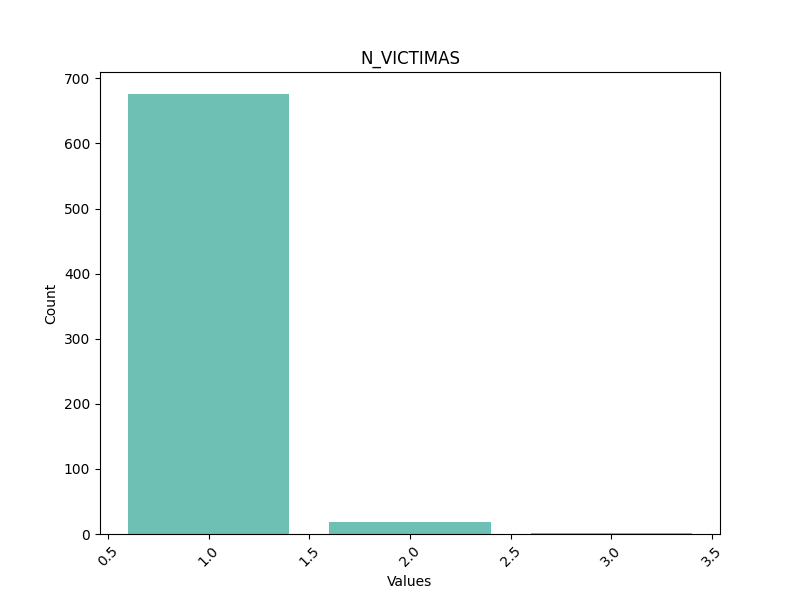

In [4]:
Image(filename='graphs/N_VICTIMAS_bar_chart.png')

Looking at the following boxplot is easy to understand the distribution of data, that, in fact, is highly concentrated in 1 victim value per accident. Values of 2 and 3 victims appears to be outliers due to data distribution. However the data is real and feasible.

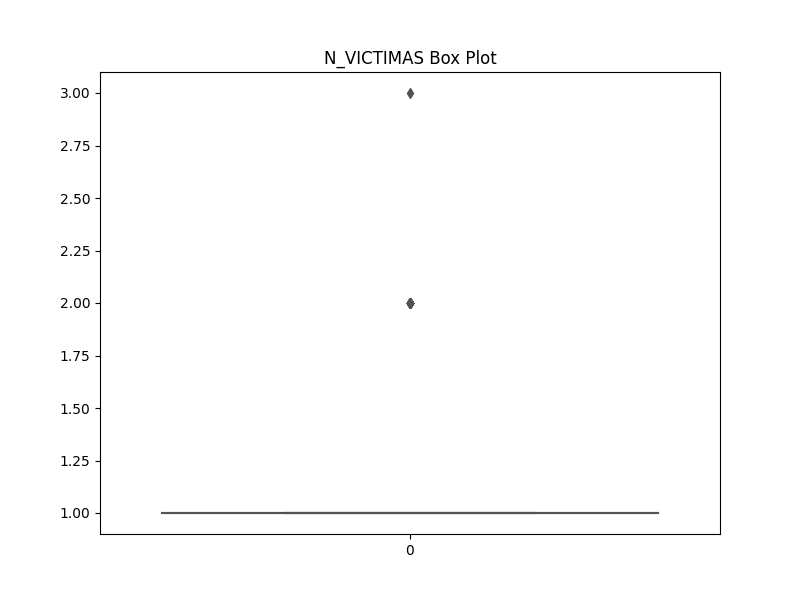

In [5]:
Image(filename='graphs/N_VICTIMAS_box_plot.png')

#### ALTURA

Removing the Null values tag 'SD' from the dataframe for proper analysis.

In [12]:
df = df_hc['ALTURA'][df_hc['ALTURA'] != 'SD']
df = df.astype(int)

The following descriptive statistics is showing a high standard deviation for the 'ALTURA' Variable. This phenomenon, added with the 129 Non-null value elements are showing a high unstable and probably no relevant data feature for the road accidents analysis. Is highly recommended to remove this column in order to optimize the prediction model and get more valuable insights.

In [13]:
df.describe()

count      129.000000
mean      3336.635659
std       3060.641793
min         30.000000
25%       1359.000000
50%       2551.000000
75%       4500.000000
max      16080.000000
Name: ALTURA, dtype: float64

The following graph is showing the data distribution, which as suggested by the standard deviation of 3060 and a mean of 3336 is highly volatile. As we can see the values are not visible at all.

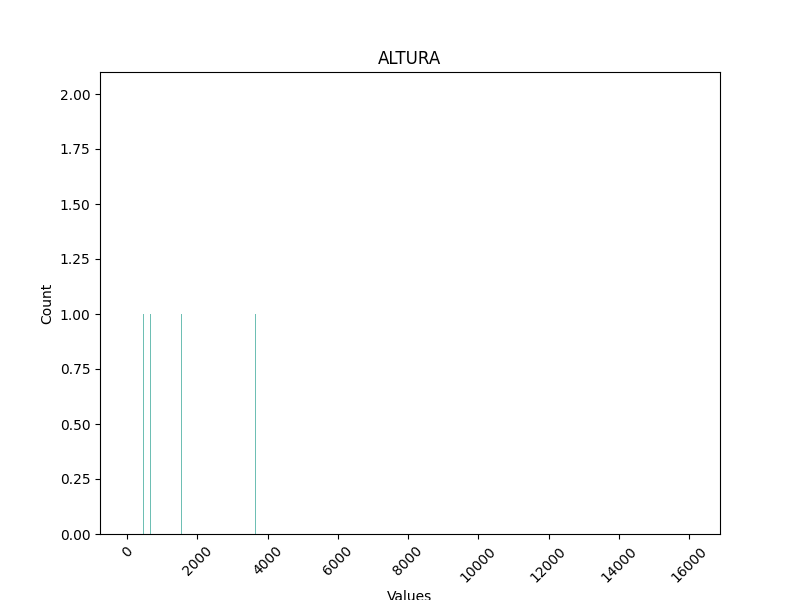

In [14]:
Image(filename='graphs/ALTURA_bar_chart.png')

The boxplot is showing a data concentration below the 8000 values of 'ALTURA', with some other outliers beyond that value.

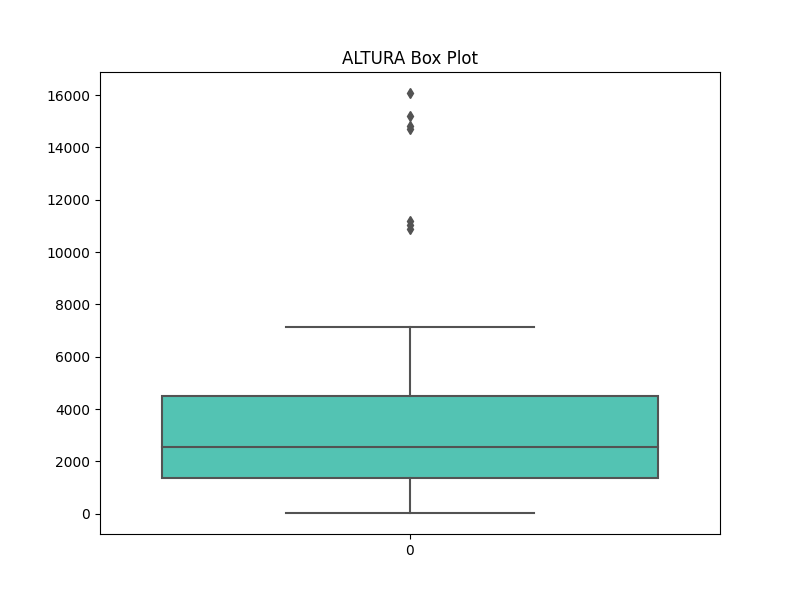

In [15]:
Image(filename='graphs/ALTURA_box_plot.png')

#### AAAA

The years registered for car road accidents oscillate between 2016 and 2021. The amount of accidents is not evenly distributed throughout the years as suggested by the standard deviation of 1.68 Years.

In [20]:
df = df_hc['AAAA']
df.describe()

count     696.000000
mean     2018.188218
std         1.683754
min      2016.000000
25%      2017.000000
50%      2018.000000
75%      2020.000000
max      2021.000000
Name: AAAA, dtype: float64

In the following graph is possible to evidence a high concentration of accidents between 2016 and 2018. Additionally, the years 2019, 2020 and 2021 have lower road accidents, probably caused by the politics and preventive measures during COVID-19 pandemia, such as home-office and other related.

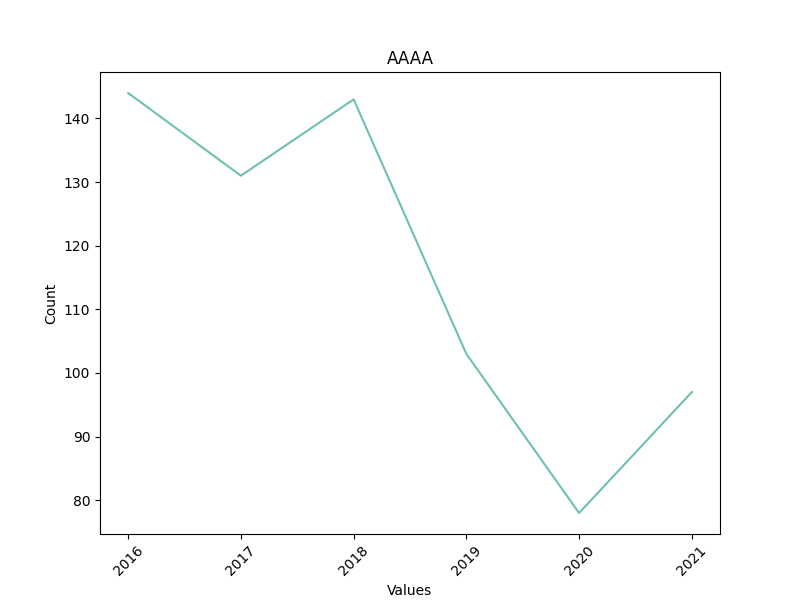

In [21]:
Image(filename='graphs/AAAA_bar_chart.png')

The box plot is showing a proper data concentration without any outlier, confirming as stated before the data aggrupation during year 2016 and 2018.

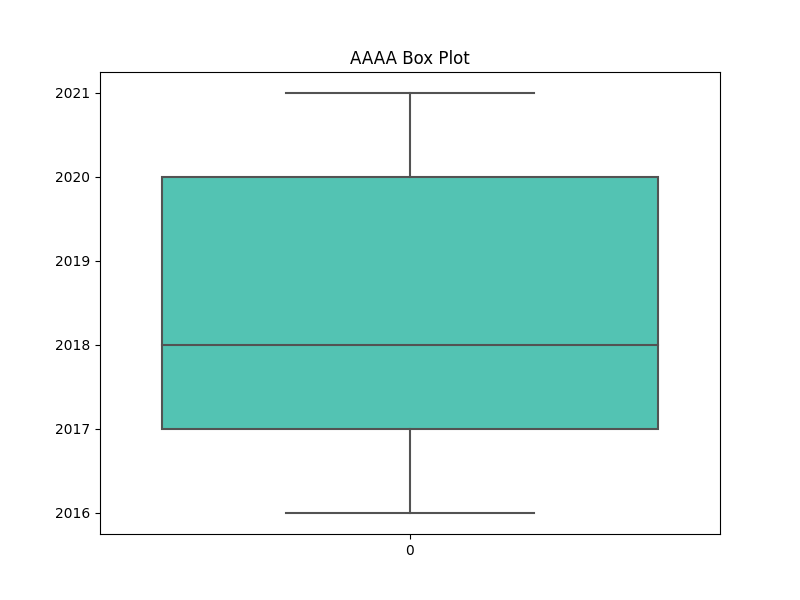

In [22]:
Image(filename='graphs/AAAA_box_plot.png')

#### MM

Months ranged from 1 to 12. Thanks to the 25% (Q1) and 75% (Q3) we know data is sightly accumulated to the upper side.

In [23]:
df = df_hc['MM']
df.describe()

count    696.000000
mean       6.692529
std        3.571309
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       12.000000
Name: MM, dtype: float64

The graph representing the Count of road accidents per Month has a valuable insight as we can see December (12) containing the highest value of road accidents. This could be explained by the fact that in Buenos Aires is common to celebrate during the whole month drinking alcoholic beverages, which induce a higher quantity of road accidents. 

Another reason that possibly explain the rising trend of accidents from october to december is related to the trips programmed by a lot of citiziens with the objective of visit distant relatives, this phenomenon increases the road traffic and therefore the probability of having more car accidents.

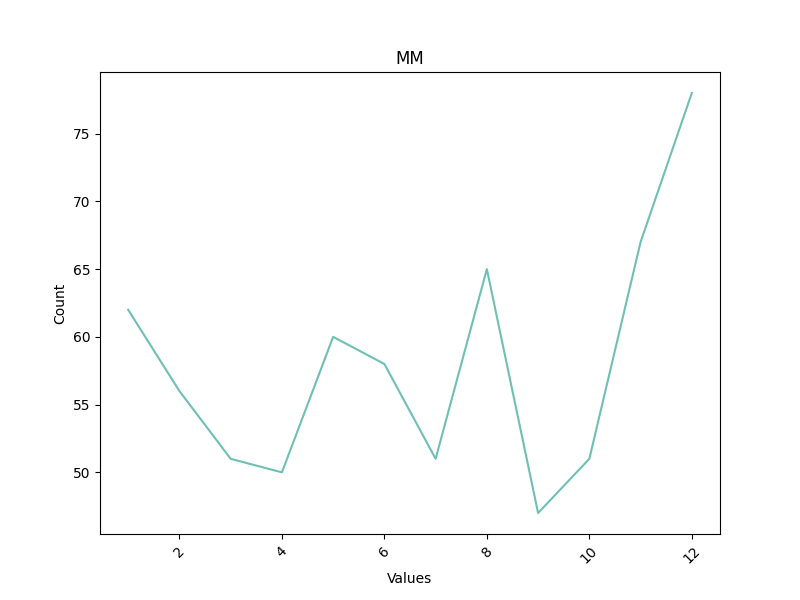

In [25]:
Image(filename='graphs/MM_bar_chart.png')

The BoxPlot shows a proper data distribution without any outlier

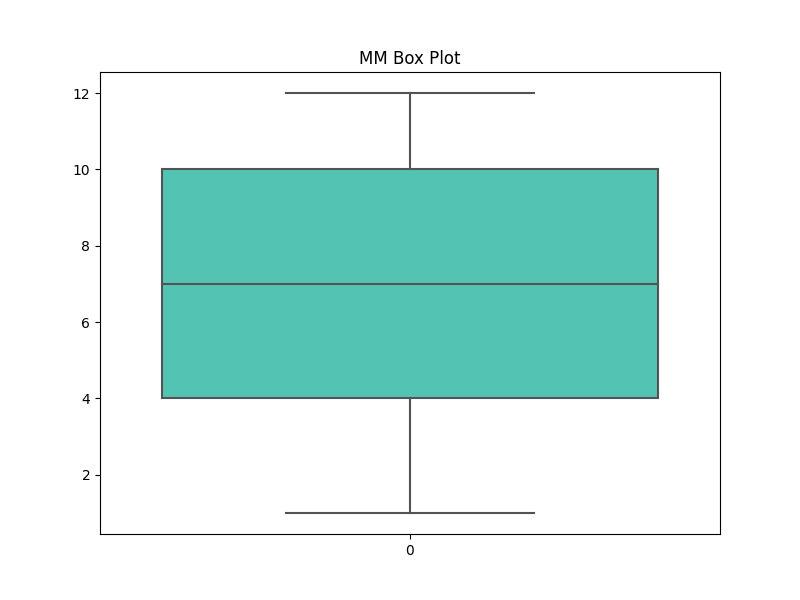

In [26]:
Image(filename='graphs/MM_box_plot.png')

#### DD

The descriptive statistics for the day variable shows that data is distributed evenly among all days without any particular bias.

In [27]:
df = df_hc['DD']
df.describe()

count    696.000000
mean      15.936782
std        8.639646
min        1.000000
25%        9.000000
50%       16.000000
75%       23.000000
max       31.000000
Name: DD, dtype: float64

The DD graph is showing the evenly distributed count of road accidents per day. Values oscillate between 15 and 30 road accidents per day in every year, which means that there is not any visible pattern that could be explained by the day in the road accidents.

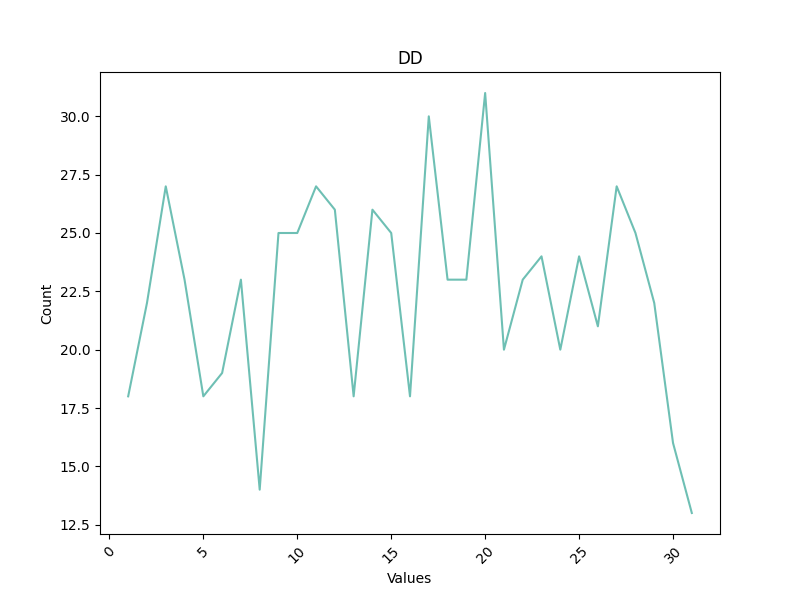

In [28]:
Image(filename='graphs/DD_bar_chart.png')

The following boxplot is confirming the evenly distribution of data for the day related to the road accidents.

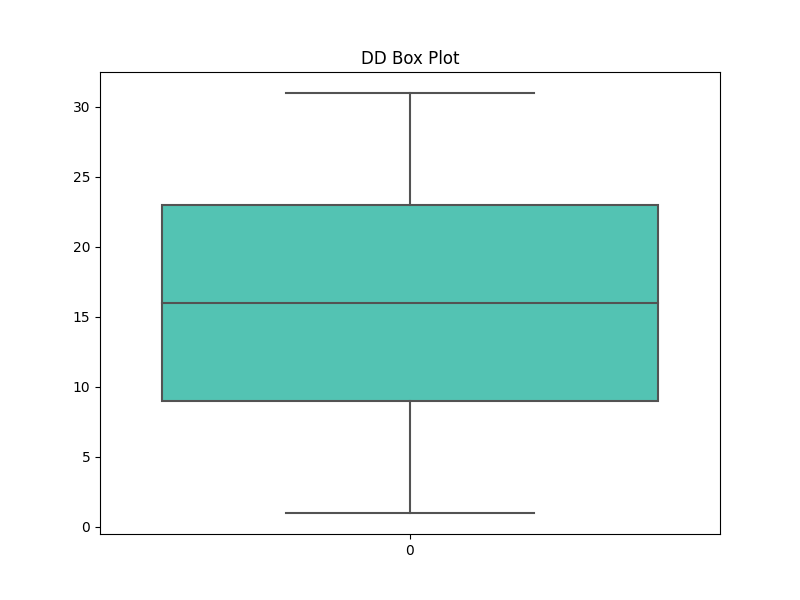

In [29]:
Image(filename='graphs/DD_box_plot.png')

#### HH

Removing null values from df

In [40]:
df = df_hc['HH'][df_hc['HH'] != 'SD']
df = df.astype(int)

Descriptive statistics show an evenly distributed data for Hours.

In [41]:
df.describe()

count    695.000000
mean      11.657554
std        6.700090
min        0.000000
25%        6.000000
50%       11.000000
75%       17.500000
max       23.000000
Name: HH, dtype: float64

There is a pattern in the graph showing a raising count of road accidents between 4 and 7 AM with a sustained trend until 9 AM. The high frequency of road accidents in this time lapse indicates that the high traffic is positively correlated, mostly because hours between 7 AM and 9 AM are common working hours.

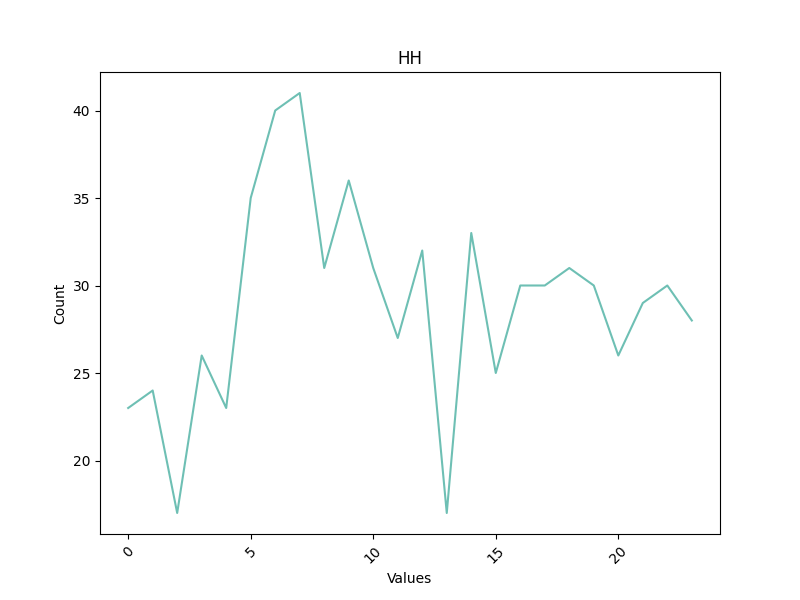

In [32]:
Image(filename='graphs/HH_bar_chart.png')

The Box Plot indicates a sightly biased concentration of data during the morning hours (AM).

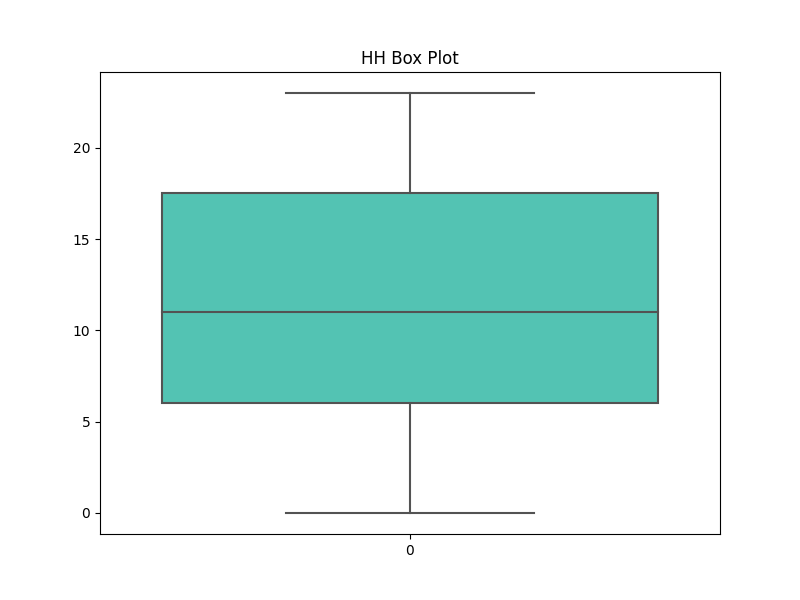

In [33]:
Image(filename='graphs/HH_box_plot.png')

#### POS X,Y

Removing empty values from coordinates

In [55]:
df_hc['POS_X'] = df_hc['POS_X'][df_hc['POS_X'] != '.']
df_hc['POS_Y'] = df_hc['POS_Y'][df_hc['POS_Y'] != '.']

Loading the citymap shapefile

In [56]:
city_map = gpd.read_file('data/geodata/comunas_wgs84.shp')

Saving longitude and latitude values in tuples for processing. Creating a geodataframe with geometry.

In [57]:
geometry = [Point(lon, lat) for lon, lat in zip(df_hc['POS_X'], df_hc['POS_Y'])]
gdf = gpd.GeoDataFrame(df_hc, geometry=geometry, crs='EPSG:4326')

Creating and plotting the figure with the data from road accidents. Stablishing the color palette and other minor details.

As we can see in the Buenos Aires MAP, most of road accidents are concentrated in the principal avenues of the city, mostly in the one called 'AV 9 de Julio'. The principal cause of this high number of accidents is related to the pattern and design of the roundabout in which multiple traffic routes converge. For a more detailed and graphical explanation the image will be showed next to the graph.

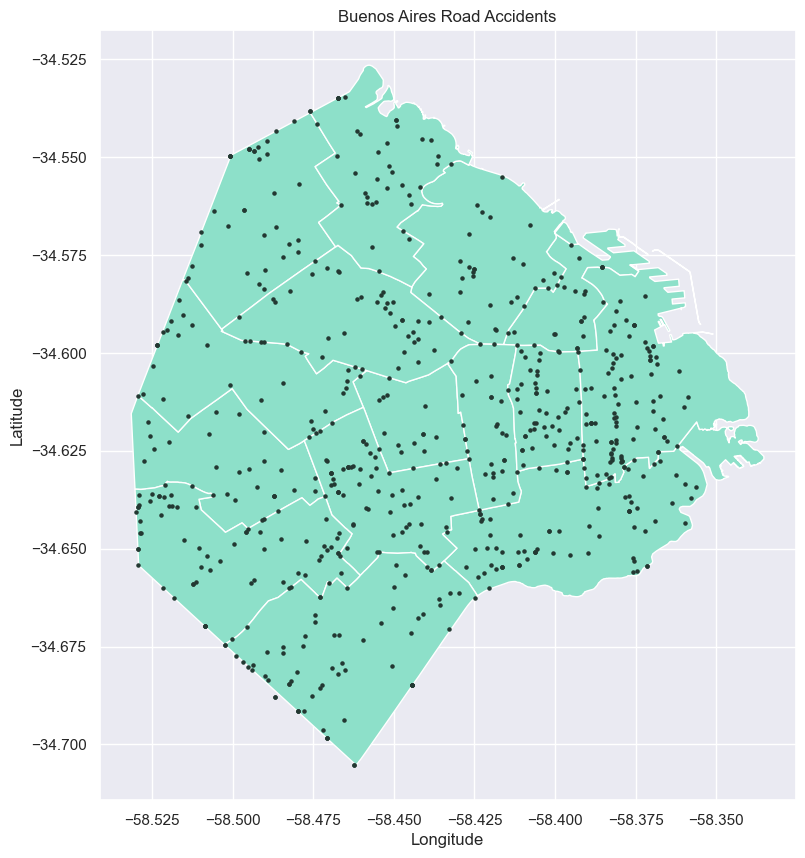

In [80]:
fig, ax = plt.subplots(figsize=(10, 10))
city_map.plot(ax=ax, color='#8DE0C9', edgecolor='white')
gdf.plot(ax=ax, marker='o', color='#233832', markersize=5)
plt.title('Buenos Aires Road Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

The following image is the graphical representation of the AV 9 de Julio obtained from google maps.

![AV 9 de Julio](src/AV%209%20de%20Julio.png)

Saving the image in 'graphs' folder

In [81]:
fig, ax = plt.subplots(figsize=(10, 10))
city_map.plot(ax=ax, color='#8DE0C9', edgecolor='white')
gdf.plot(ax=ax, marker='o', color='#233832', markersize=5)
plt.title('Buenos Aires Road Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.savefig(f'graphs/road_accidents_map.png')
plt.close()

### Qualitative Variables

Filtering the qualitative variables from the metadata

In [48]:
df_cat = df_md[df_md['CLASE'] == 'Categorica']
df_cat

,VARIABLE,DESCRIPCION,DTYPE,CLASE,CATEGORIA
0,ID,Identificador unico del siniestro,[<class 'str'>],Categorica,Nominal
2,FECHA,Fecha en formato dd/mm/aaaa,[<class 'str'>],Categorica,Ordinal
6,HORA,Hora del siniestro,[<class 'str'>],Categorica,Ordinal
8,LUGAR,Dirección del hecho,[<class 'str'>],Categorica,Nominal
9,TIPO_CALLE,Tipo de arteria. Para intersecciones se clasif...,[<class 'str'>],Categorica,Nominal
10,CALLE,Nombre de la arteria donde se produjo el hecho,[<class 'str'>],Categorica,Nominal
12,CRUCE,Cruce en caso de que sea una encrucijada,[<class 'str'>],Categorica,Nominal
13,DIRECCION,Direccion en formato normalizado usig,[<class 'str'>],Categorica,Nominal
14,COMUNA,Comuna de la ciudad (1 a 15),[<class 'int'>],Categorica,Nominal
15,XY_(CABA),Geocodificación plana,[<class 'str'>],Categorica,Nominal


#### COMUNA

In [11]:
path = 'data/homicidios.xlsx'
df_hc = pd.read_excel(path, sheet_name='HECHOS')

In [12]:
df_hc['COMUNA'] = df_hc['COMUNA'].astype(str)

c:\Users\david\OneDrive - Universidad del rosario\Educacion\Cursos\Henry_Programacion\Road-Accidents-DA\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\david\OneDrive - Universidad del rosario\Educacion\Cursos\Henry_Programacion\Road-Accidents-DA\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\david\OneDrive - Universidad del rosario\Educacion\Cursos\Henry_Programacion\Road-Accidents-DA\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cate

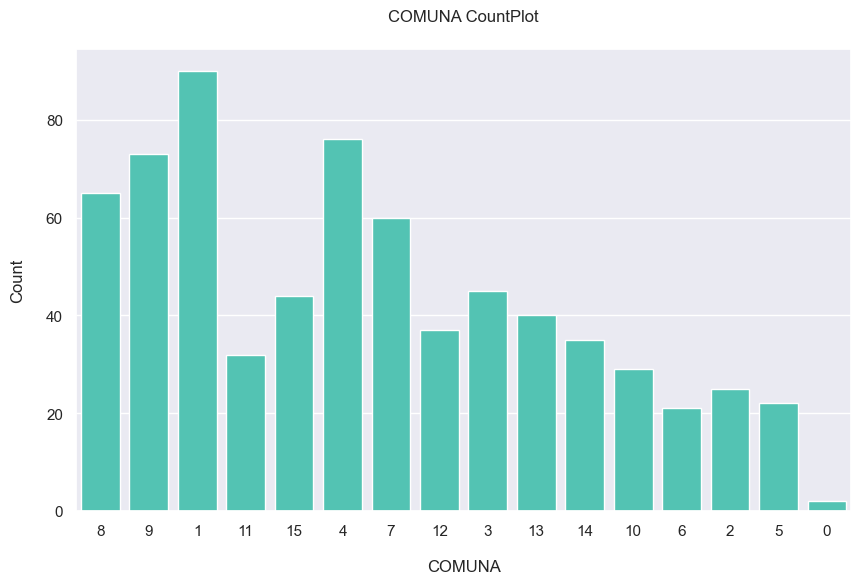

In [42]:
# Define the custom color
custom_color = "#40D6C0"

# Create a custom palette with the specified color
custom_palette = sns.color_palette([custom_color])

# Create a countplot with the custom color palette
plt.figure(figsize=(10, 6))
sns.countplot(data=df_hc, x='COMUNA', palette=custom_palette)
plt.xlabel('COMUNA', labelpad=15)
plt.ylabel('Count', labelpad=15)
plt.title('COMUNA CountPlot', pad=20)

plt.show()

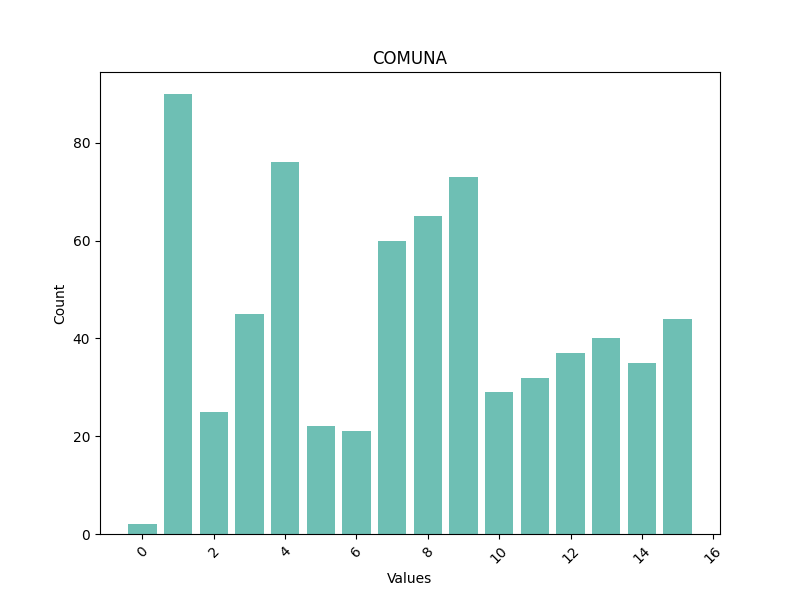

In [17]:
Image(filename='graphs/COMUNA_bar_chart.png')

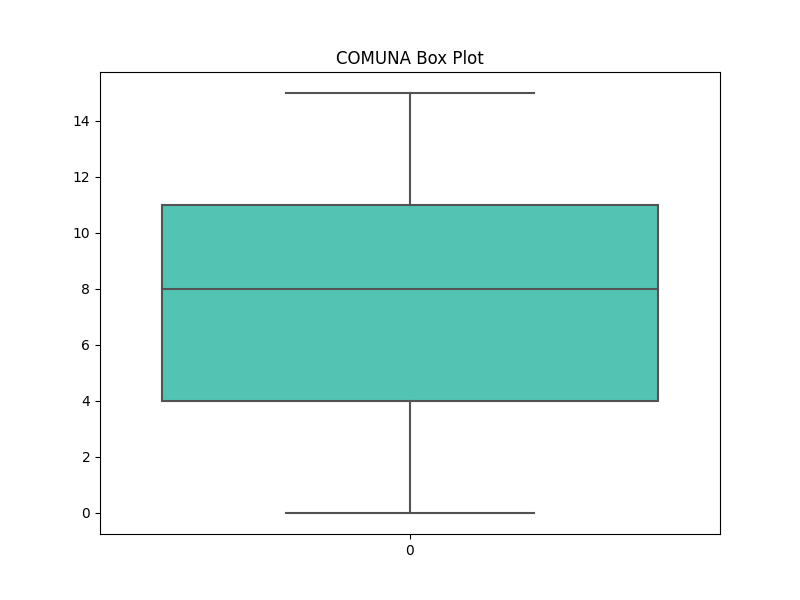

In [18]:
Image(filename='graphs/COMUNA_box_plot.png')